<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/BP_Tungkub_Rs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
#Import Library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
#Reading Dataset dalam format data Excel
df = pd.read_excel('/content/Tungkub_Hourly_PM_New.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()

,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2023-02-13 12:00:02,2023,44,12,29.312,70.219,1,438.1,-0.23786,1.023978,...,1260.465453,193.254701,33.560402,69,247.741287,0.891869,0.364028,h,0.12,m
3,2023-02-13 13:00:02,2023,44,13,29.676,69.697,1.67,375.6,-0.23786,1.023978,...,1256.371338,115.721378,28.75582,69,221.961341,0.799061,0.326147,rc day,69.00,s/m
4,2023-02-13 14:00:02,2023,44,14,28.11,78.695,1.34,323.1,-0.23786,1.023978,...,1252.723978,144.219926,24.783312,69,179.529946,0.646308,0.263799,rc night,690.00,s/m
5,2023-02-13 15:00:02,2023,44,15,26.588,76.712,1,214.4,-0.23786,1.023978,...,1245.78727,193.254701,16.314088,69,121.028726,0.435703,0.177838,Latitude,-8.00,degrees
6,2023-02-13 16:00:02,2023,44,16,27.767,76.011,0.67,210.6,-0.23786,1.023978,...,1242.785238,288.439852,16.06366,69,119.201398,0.429125,0.175153,Longitude,115.00,degrees


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 2 to 5562
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5561 non-null   object 
 1   Year         5561 non-null   object 
 2   DOY          5561 non-null   object 
 3   Time         5561 non-null   object 
 4   T            5561 non-null   object 
 5   RH           5561 non-null   object 
 6   U            5561 non-null   object 
 7   Rs           5561 non-null   object 
 8   Dec          5561 non-null   object 
 9   dr           5561 non-null   object 
 10  t.c.         5561 non-null   object 
 11  angh         5561 non-null   object 
 12  cos θ        5561 non-null   object 
 13  Rs pot       5561 non-null   object 
 14  TRA          5561 non-null   float64
 15  Rb           5561 non-null   object 
 16  es           5561 non-null   object 
 17  e            5561 non-null   object 
 18  VPD          5561 non-null   object 
 19  Rn    

In [107]:
#Mengubah Tipe data menjadi Float
df[['Rs', 'RH', 'U', 'T', 'ET']] = df[['Rs', 'RH', 'U', 'T', 'ET']].astype(float)

In [108]:
df[['Rs', 'RH', 'U', 'T', 'ET']].describe()


,Rs,RH,U,T,ET
count,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000
mean,193.424510,81.053563,0.400599,26.378555,0.155387
std,303.738622,12.268428,0.285843,3.545059,0.246353
min,0.600000,39.576000,0.200000,19.124000,-0.009454
25%,0.600000,70.335000,0.200000,23.671000,0.000704
50%,4.400000,85.489000,0.330000,25.665000,0.004404
75%,265.600000,91.156000,0.670000,29.269000,0.212025
max,1276.900000,99.261000,2.670000,35.789000,1.022930


In [109]:
#Input features dan target variable
features_variable = df['Rs']
target_variable = df['ET']

X = features_variable #independent variabel
y = target_variable #dependent variabel

In [110]:
#Split dataset untuk training dan testing dataset dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Jumlah data untuk training dan testing
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(3892,) (1669,) (3892,) (1669,)


In [111]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

In [119]:
# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Fit the model
bp = model.fit(X_train, y_train, epochs=50, batch_size=10)



Epoch 1/50
390/390 [==============================] - 1s 2ms/step - loss: 1.3884e-04
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 1.6473e-04
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 1.5441e-04
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 1.7534e-04
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 1.3713e-04
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 1.2994e-04
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 1.3703e-04
Epoch 8/50
390/390 [==============================] - 1s 2ms/step - loss: 1.4141e-04
Epoch 9/50
390/390 [==============================] - 1s 2ms/step - loss: 1.8558e-04
Epoch 10/50
390/390 [==============================] - 1s 2ms/step - loss: 1.2170e-04
Epoch 11/50
390/390 [==============================] - 1s 2ms/step - loss: 1.1192e-04
Epoch 12/50
390/390 [==============================] - 1s 2ms/s

In [120]:
#Prediction on Training Dataset
ytrain_pred = model.predict(X_train)

#Nilai R Squared pada Data Training
print('Nilai R_Squared (Training): %.2f'% r2_score(y_train, ytrain_pred))
#Nilai MSE pada Data Training
print('Nilai MSE (Training): %.2f'% mean_squared_error(y_train, ytrain_pred))
#Nilai RMSE pada Data Training
print('The RMSE (Training): %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

122/122 [==============================] - 0s 1ms/step
Nilai R_Squared (Training): 1.00
Nilai MSE (Training): 0.00
The RMSE (Training): 0.01


In [122]:
#Prediction on Testing Dataset
ytest_pred = model.predict(X_test)

# Evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, ytest_pred))
print('Nilai R_Squared (Testing): %.2f'% r2_score(y_test, ytest_pred))
print('Mean Squared Error (Testing) : %.2f'% mean_squared_error(y_test, ytest_pred))
print(f'Root Mean Squared Error (Testing): {rmse}')

53/53 [==============================] - 0s 5ms/step
Nilai R_Squared (Testing): 1.00
Mean Squared Error (Testing) : 0.00
Root Mean Squared Error (Testing): 0.010975602655783583


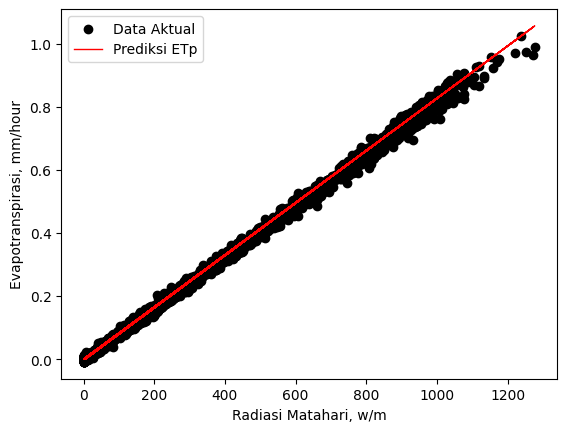

In [125]:
import matplotlib.pyplot as plt
## Plot data aktual dan prediksi pada data pelatihan
plt.scatter(X_train, y_train, color='black', label='Data Aktual')
plt.plot(X_train, ytrain_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.xlabel('Radiasi Matahari, w/m')
plt.ylabel('Evapotranspirasi, mm/hour')
plt.legend()
plt.show()

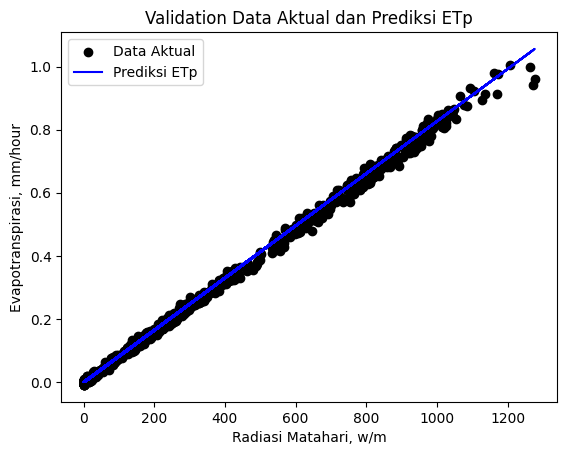

In [127]:
#Plot pada data test
plt.scatter(X_test, y_test, color = 'black', label = 'Data Aktual')
plt.plot(X_test, ytest_pred, color='blue', label='Prediksi ETp')
plt.title('Validation Data Aktual dan Prediksi ETp')
plt.xlabel('Radiasi Matahari, w/m')
plt.ylabel('Evapotranspirasi, mm/hour')
plt.legend()
plt.show()